In [64]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy as scp;
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [47]:
data = np.loadtxt("../plot_finer/test_with_tof.txt", delimiter=',', dtype=np.complex64);

In [48]:
data_subtracted=data[:, 4:]
np.shape(data_subtracted)

(3701, 769)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_9217/1862299795.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_9217/1862299795.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$p(\hbar k_L)$")


Text(0, 0.5, '$p(\\hbar k_L)$')

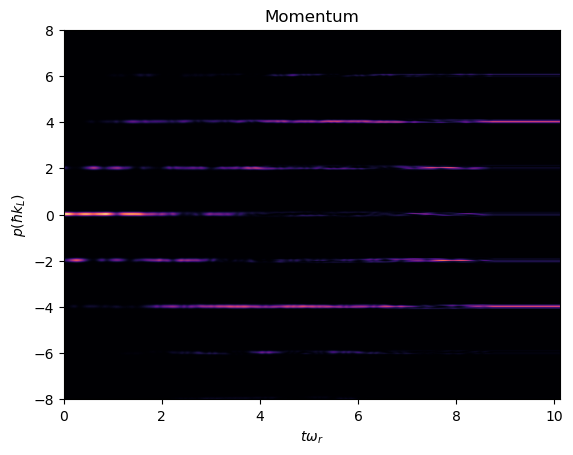

In [49]:
plt.imshow(np.square(np.abs(data_subtracted)).T, cmap = "magma", extent = [ data[0,2],data[-1,2], -16/2,16/2 ,],origin="lower",aspect = "auto")
plt.grid(False)
plt.title("Momentum")
plt.xlabel("$t\omega_r$")
plt.ylabel("$p(\hbar k_L)$")

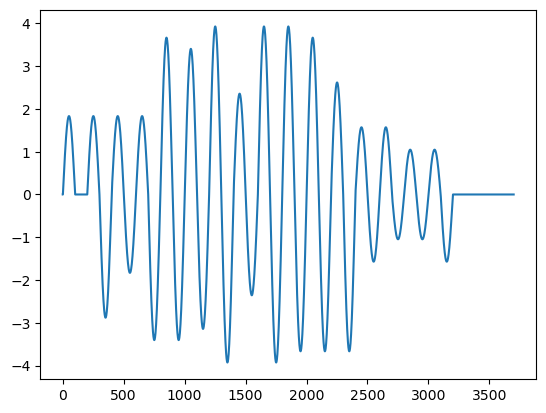

In [50]:
plt.plot(data[:,3])

## FFT STYLE 1

In [ ]:
myfft = np.array([scp.fft.fft( data_subtracted[n,:]) for n in range(len(data_subtracted))])

In [ ]:
x_val=np.square(np.abs(myfft))

In [ ]:
plt.imshow(x_val.T, cmap="magma", aspect="auto")

In [ ]:
halfway = int((len(x_val[:,0])-1)/2)
halfway

In [ ]:
x_reshaped = np.concatenate( (x_val[:,halfway:], x_val[:,0:halfway+1]), axis=1 )

In [ ]:
plt.imshow(x_val[:, halfway:-1], cmap="magma", aspect="auto")

In [ ]:
plt.imshow(x_val[:,0:halfway+1], aspect = "auto")

## FFT STYLE 2

In [51]:
halfway = int((len(data_subtracted[0,:])-1)/2)
halfway
p_reshaped = np.concatenate( (data_subtracted[:,halfway:], data_subtracted[:,0:halfway+1]), axis=1 )

In [52]:
myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])

In [53]:
myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )

## WARNING: Why aren't these normalized

In [54]:
temp = np.square(np.abs(myfft_reshaped));
myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9217/3696571422.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_9217/3696571422.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Amplitude $A$ of $\phi=A\sin\omega t$")
/tmp/ipykernel_9217/3696571422.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t(\omega_R^{-1})$")
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values

8.741823036075946


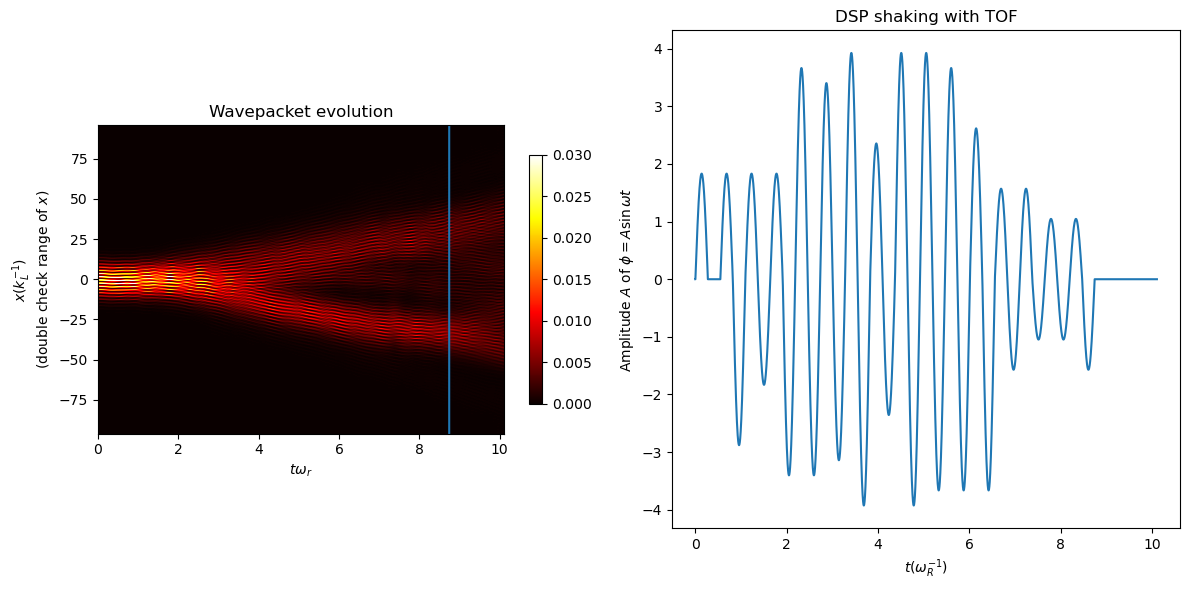

In [76]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
im=plt.imshow(myfft_reshaped_rescaled.T, cmap="hot",aspect="0.04", vmax=0.03, extent=[data[0,2],data[-1,2], -96, 96])
ax = plt.gca()
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="25%", pad=0.1)
#plt.colorbar(im, cax=cax)
plt.colorbar(shrink = 0.5)

plt.xlabel("$t\omega_r$")
plt.ylabel("$x (k_L^{-1})$ \n(double check range of $x$)")
plt.title("Wavepacket evolution")
print( 32*np.pi/11.5)
y = np.arange(-96,96,0.1);
plt.plot(np.ones(len(y))*32*np.pi/11.5, y)


plt.subplot(122)
plt.plot(data[:,2],data[:,3])
plt.title("DSP shaking with TOF")
plt.ylabel("Amplitude $A$ of $\phi=A\sin\omega t$") 
plt.xlabel("$t(\omega_R^{-1})$")
plt.tight_layout()

In [45]:
print(myfft_reshaped_rescaled.shape, data_subtracted.shape)

(3601, 771) (3601, 769)
